# Part D
We try to find $k_1$ and $k_2$ in the following equation:

$\frac{dv}{dt} = k_1 \cdot \text{throttle} - k_2 \cdot v + \text{noise}$

We find this by trying to fit an equation to the given dataset

In [29]:
#processing the data
datafile = open("dataset_bolt_model.txt", 'r')
data = datafile.readlines()[1:]
processed_data = [list(map(float, line.split())) for line in data]
t_values = [i[0] for i in processed_data] #x-axis
v_values = [i[1] for i in processed_data] #y-axis
#print(x_values, '\n', y_values)


In [25]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

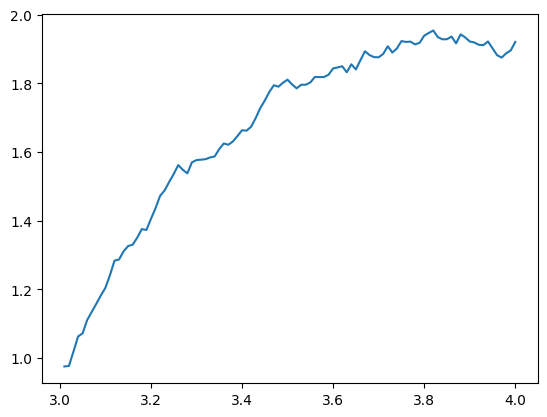

In [26]:
plt.plot(t_values, v_values);

In [27]:
def fitfunc(t, k1, k2):
    throttle = 40
    v0 = 1

    def myode(v,t):
        dvdt = k1*throttle - k2*v
        return dvdt
    
    v_sol = scipy.integrate.odeint(myode, v0, t)
    return v_sol[:,0]

k_fit, kcov = scipy.optimize.curve_fit(fitfunc, t_values, v_values, p0 = (0, 0))
    
print(k_fit)

[0.1455843  2.89762074]


We now check if the k values given by the code looks okay. (Sanity check)

0.145584295473428 2.8976207362313526


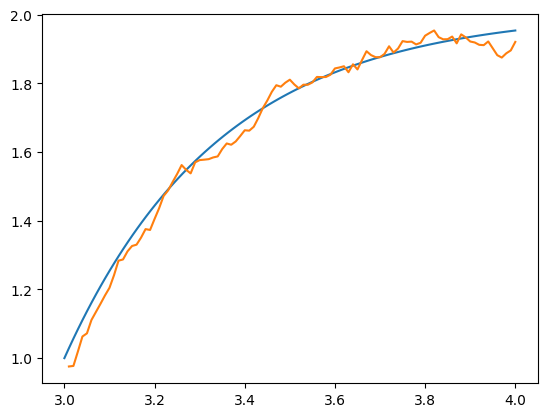

In [28]:
def myode(v,t):
    dvdt = k1*throttle - k2*v
    return dvdt

k1, k2 = k_fit
throttle = 40
v0 =1

x_vals = np.linspace(3, 4, 100)
y_vals = scipy.integrate.odeint(myode, v0, x_vals)

plt.plot(x_vals, y_vals);
plt.plot(t_values, v_values);
print(k1, k2)

We have achieved what we wanted to do, i.e found out the values of k1 and k2.

k1 = 0.145584295473428

k2 = 2.8976207362313526